# Life Expectancy Forecasting 


* [**Introduction**](#introduction)
* [**Importing libraries and data**](#import)
* [**Data Preprocessing**](#preprocessing)
* [**Exploratory Data Analysis**](#exploratory_data_analysis)
* [**Feature Engineering and Selection**](#feature_engineering)
* [**Machine Learning**](#model)
* [**Conclusions**](#conclusions)

<a id='introduction'></a>

## Introduction

## The business question

### <span style="color:blue"> Life Expectancy forecasting helps in understanding what factors are most responsible for short and long lifespans in countries.</span>

**The goal:** Forecast life expenctancy for a country.

<ins>**How does this help UON ML 2022 Class?**<ins>
* Gauge the technical skills required to prepare data and build a Linear regression ML model. 
* Understand factors that influence life expectancy. 

## Solution

* **Assumptions:**
- The life expectancy can be described by the features in the dataset. 
 

* Using the data provided, Group F builds a life expectancy prediction model that is able to provide approximate expected life span based on the features provided. 

* A linear regression model is built to model life expectancy based on the features provided.
* Root Mean Squared Error is used as an evaluation metric. 


<a id='import'></a>

## Importing libraries and data

### Libraries and settings

In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import seaborn as sns
sns.set(font_scale = 2)

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 350)

data = pd.read_csv('../data/life_expectancy.csv')


Bad key text.latex.preview in file c:\ProgramData\Anaconda3\envs\DataMasked\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\ProgramData\Anaconda3\envs\DataMasked\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\ProgramData\Anaconda3\envs\DataMasked\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is s

In [2]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,...,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,...,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,...,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,...,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,...,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,...,2978599.0,18.2,18.2,0.454,9.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<a id='preprocessing'></a>
# Data Preprocessing

<a id='exploratory_data_analysis'></a>
## Exploratory Data Analysis

In [4]:
data.describe().T # Some columns have missing values

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [5]:
data.isnull().sum() # Check if some columns have missing values

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
#Checking for missing values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The dataset has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(data)

The dataset has 22 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Population,652,22.2
Hepatitis B,553,18.8
GDP,448,15.2
Total expenditure,226,7.7
Alcohol,194,6.6
Income composition of resources,167,5.7
Schooling,163,5.5
BMI,34,1.2
thinness 1-19 years,34,1.2
thinness 5-9 years,34,1.2


In [7]:
group_by_country = data.groupby(['Year']).mean().sort_values(by='Life expectancy ', ascending=False).head(10)
group_by_country

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,...,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,,,,,,,,,,,
2015,71.616940,152.863388,23.803279,5.288333,2.383906,...,1.109741e+07,4.534807,4.575691,0.691740,12.927168
2014,71.536612,148.688525,24.557377,3.271319,1001.912550,...,2.106296e+07,4.532597,4.676243,0.688393,12.887283
2013,71.236066,148.765027,23.968912,3.924450,836.623984,...,1.235609e+07,4.470370,4.425397,0.685648,12.688333
2012,70.916940,148.792350,26.338798,4.138187,1011.471726,...,1.252438e+07,4.584530,4.598895,0.679572,12.724277
2011,70.654098,156.535519,26.830601,4.871648,1029.534746,...,1.129574e+07,4.594475,4.568508,0.674555,12.604624
2010,70.048634,161.863388,27.928962,4.943626,768.221388,...,1.181332e+07,4.659116,4.639779,0.655197,12.446821
2009,69.938251,163.393443,28.956284,4.889231,719.827424,...,9.132068e+06,4.786740,4.718232,0.651434,12.310983
2008,69.427869,174.519126,29.568306,5.007088,1095.802669,...,9.487742e+06,4.907182,4.941436,0.645717,12.176301
2007,69.036066,159.808743,30.612022,5.014066,954.458468,...,1.853530e+07,5.034807,4.976243,0.639000,12.038150


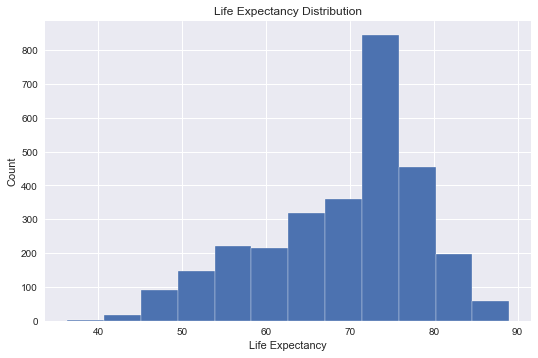

In [8]:
# Histogram of Life Expectancy
plt.style.use('seaborn')
plt.hist(data['Life expectancy '].dropna(), bins=12);
plt.xlabel('Life Expectancy'); plt.ylabel('Count'); 
plt.title('Life Expectancy Distribution');

# Most countries have life expectancy between 70 and 75 years

<ins>**Observations**:<ins>

- This data is skewed towards the right. 
- The life expectancy for most countries increases steadily from late thirties to late eighties
- The dataset does not contain any missing values of outliers.
- The mean salary is 116 and the median is 114. 
- There is a slight presence of a right tail. 

In [9]:
# Find all correlations and sort 
correlations_data = data.corr()['Life expectancy '].sort_values()

correlations_data

Adult Mortality                   -0.696359
 HIV/AIDS                         -0.556556
 thinness  1-19 years             -0.477183
 thinness 5-9 years               -0.471584
under-five deaths                 -0.222529
infant deaths                     -0.196557
Measles                           -0.157586
Population                        -0.021538
Year                               0.170033
Total expenditure                  0.218086
Hepatitis B                        0.256762
percentage expenditure             0.381864
Alcohol                            0.404877
GDP                                0.461455
Polio                              0.465556
Diphtheria                         0.479495
 BMI                               0.567694
Income composition of resources    0.724776
Schooling                          0.751975
Life expectancy                    1.000000
Name: Life expectancy , dtype: float64

<ins>**Observations**:<ins>

- HIV/AIDs has the strongest negative correlation with life expectancy while Schooling has the strongest positive correlation with life expectancy.  
- Interestingly, higher intakes alcohol, diphtheria and BMI result in a higher life expectancy. 
- Population has the highest percentage of missing values yet its correlation influence is not significant. 

In [10]:
# Discard columns with missing values more than 20%

missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 20].index)
print('\n','We will remove %d column(s).' % len(missing_columns))

# Drop the columns
data = data.drop(columns = list(missing_columns))

The dataset has 22 columns.
There are 14 columns that have missing values.

 We will remove 1 column(s).


In [11]:
data['Life expectancy '].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64

In [12]:
from scipy import stats

_, p = stats.normaltest(data['Life expectancy '])
print('Normal Test',format(p, '.3f'))
print(p <= 0.05)

# Check with Shapiro - Wilk test
from scipy.stats import shapiro

_, p = shapiro(data['Life expectancy '])
print('Shapiro Test', format( p, '.3f'))
print(p <= 0.05)

Normal Test nan
False
Shapiro Test 1.000
False


<ins>**Observations**:<ins>

We use a statistical test to verify whether life expectancy has a normal distribution or not. A p- value smaller than 0.05 means the null hypothesis is rejected. As such, a p-value of 0.05 or greater means that the distribution is a normal distribution. 

Life expectancy, therefore, does follow a normal distribution. 

A Shapiro-Wilk test is also used to confirm if the data has been drawn from a normal distribution or not. The results are similar to observations made using the D’Agostino’s K^2 Test. 

In [13]:
data.groupby(['Country']).mean().sort_values(by='Life expectancy ', ascending=False).head(10)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,...,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,
Japan,2007.5,82.53750,57.1250,2.8750,7.040667,...,24892.544784,1.81250,1.54375,0.876563,14.97500
Sweden,2007.5,82.51875,59.1875,0.0000,6.926667,...,29334.990639,1.35000,1.30625,0.893125,15.86875
Iceland,2007.5,82.44375,49.3750,0.0000,7.466000,...,30159.502907,0.95625,0.90000,0.885313,18.15625
Switzerland,2007.5,82.33125,55.7500,0.0000,10.338000,...,57362.874601,0.53750,0.39375,0.911062,15.39375
France,2007.5,82.21875,73.1250,2.9375,12.404667,...,26465.551381,0.62500,0.60000,0.870563,15.90000
Italy,2007.5,82.18750,54.1875,2.0000,8.266667,...,21234.782371,0.51250,0.52500,0.858062,15.93125
Spain,2007.5,82.06875,63.6250,1.6250,10.024000,...,17093.459737,0.60000,0.50000,0.850562,16.35625
Australia,2007.5,81.81250,63.1875,1.0000,10.155333,...,34637.565047,0.66875,0.62500,0.918125,20.03750
Norway,2007.5,81.79375,66.2500,0.0000,6.234375,...,27434.946928,0.76250,0.70000,0.931438,17.46875


In [14]:
data.groupby(['Country'])['Life expectancy '].mean().sort_values(ascending=False).head(20)

Country
Japan                                                   82.53750
Sweden                                                  82.51875
Iceland                                                 82.44375
Switzerland                                             82.33125
France                                                  82.21875
Italy                                                   82.18750
Spain                                                   82.06875
Australia                                               81.81250
Norway                                                  81.79375
Canada                                                  81.68750
Austria                                                 81.48125
Singapore                                               81.47500
New Zealand                                             81.33750
Israel                                                  81.30000
Greece                                                  81.21875
Germany          

In [15]:
data.groupby(['Country'])['Life expectancy '].mean().dropna().sort_values(ascending=False).tail(20)

Country
Burkina Faso                55.64375
Burundi                     55.53750
Guinea-Bissau               55.36875
Equatorial Guinea           55.31250
Mali                        54.93750
Cameroon                    54.01875
Zambia                      53.90625
South Sudan                 53.87500
Mozambique                  53.39375
Somalia                     53.31875
Nigeria                     51.35625
Swaziland                   51.32500
Zimbabwe                    50.48750
C̫te d'Ivoire               50.38750
Chad                        50.38750
Malawi                      49.89375
Angola                      49.01875
Lesotho                     48.78125
Central African Republic    48.51250
Sierra Leone                46.11250
Name: Life expectancy , dtype: float64

In [16]:
data.groupby(['Year', 'Country'])['Life expectancy '].mean().dropna().sort_values(ascending=False).tail(20)

Year  Country     
2004  Malawi          45.1
      Lesotho         44.8
2002  Zimbabwe        44.8
2001  Zambia          44.6
2003  Malawi          44.6
2005  Zimbabwe        44.6
      Lesotho         44.5
2003  Zimbabwe        44.5
2004  Zimbabwe        44.3
2006  Sierra Leone    44.3
2002  Malawi          44.0
2000  Zambia          43.8
2001  Malawi          43.5
2005  Sierra Leone    43.3
2000  Malawi          43.1
2004  Sierra Leone    42.3
2003  Sierra Leone    41.5
2001  Sierra Leone    41.0
2000  Sierra Leone    39.0
2010  Haiti           36.3
Name: Life expectancy , dtype: float64

In [17]:
data.groupby(['Year', 'Country'])['Life expectancy '].mean().dropna().sort_values(ascending=False).head(20)

Year  Country    
2004  Italy          89.0
2014  Portugal       89.0
      Finland        89.0
2007  Sweden         89.0
      France         89.0
2014  Germany        89.0
2007  Spain          89.0
2014  Belgium        89.0
2010  New Zealand    89.0
2008  France         89.0
2009  Norway         89.0
2011  Austria        88.0
2015  Slovenia       88.0
2006  Sweden         88.0
2012  Austria        88.0
2004  Iceland        88.0
2010  Netherlands    88.0
2005  Italy          88.0
2011  Luxembourg     88.0
2014  Greece         88.0
Name: Life expectancy , dtype: float64

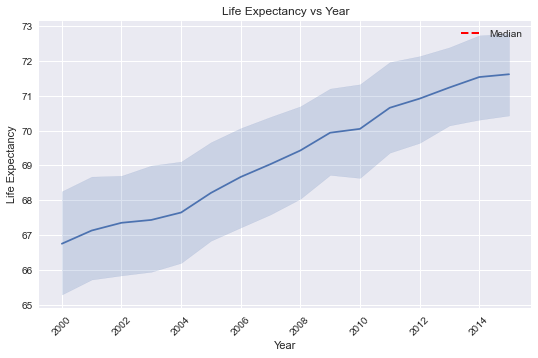

In [18]:
ax = sns.lineplot(x = 'Year', y = 'Life expectancy ', 
                  markers = True, dashes = False, data = data)
plt.axhline(data['Life expectancy '].unique().mean(), color='red', linestyle='--', linewidth=2, label='Median')
plt.xticks(rotation = 45)
plt.title('Life Expectancy vs Year')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(loc='best')

<ins>**Observations**:<ins>

Mean is used as the statistical measure because it describes the average life expectancy of the population. 

Developed countries are seen to have the highest life expectancy. 

African countries seem to have the lowest life expectancies.

In general, life expectancy increases across the years. 

<a id='feature_engineering'></a>
## Feature Engineering and Selection

In [19]:
data = data.dropna(subset=['Life expectancy ']) # Drop rows with missing life expectancy values

In [20]:
data.corr()['Life expectancy '].dropna().sort_values()

Adult Mortality                   -0.696359
 HIV/AIDS                         -0.556556
 thinness  1-19 years             -0.477183
 thinness 5-9 years               -0.471584
under-five deaths                 -0.222529
infant deaths                     -0.196557
Measles                           -0.157586
Year                               0.170033
Total expenditure                  0.218086
Hepatitis B                        0.256762
percentage expenditure             0.381864
Alcohol                            0.404877
GDP                                0.461455
Polio                              0.465556
Diphtheria                         0.479495
 BMI                               0.567694
Income composition of resources    0.724776
Schooling                          0.751975
Life expectancy                    1.000000
Name: Life expectancy , dtype: float64

In [21]:
# Remove highly correlated features
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between life expectancy
    y = x['Life expectancy ']
    x = x.drop(columns = ['Life expectancy '])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    
    # Add life expectancy back in to the data
    x['Life expectancy '] = y
               
    return x

In [22]:
# Remove the collinear features above a specified correlation coefficient
data = remove_collinear_features(data, 0.6);

under-five deaths  | infant deaths | 1.0
Diphtheria  | Hepatitis B | 0.61
Diphtheria  | Polio | 0.67
GDP | percentage expenditure | 0.9


In [23]:
data.shape

(2928, 18)

In [24]:
data.corr()['Life expectancy '].dropna().sort_values()

Adult Mortality                   -0.696359
 HIV/AIDS                         -0.556556
 thinness  1-19 years             -0.477183
 thinness 5-9 years               -0.471584
infant deaths                     -0.196557
Measles                           -0.157586
Year                               0.170033
Total expenditure                  0.218086
Hepatitis B                        0.256762
percentage expenditure             0.381864
Alcohol                            0.404877
Polio                              0.465556
 BMI                               0.567694
Income composition of resources    0.724776
Schooling                          0.751975
Life expectancy                    1.000000
Name: Life expectancy , dtype: float64

<a id='model'></a>
## Machine Learning

In [25]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

#Imputing missing values and scaling values
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor

#ML
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor, Pool
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#Metrics 
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score

#Hyperparameter tuning
import optuna 

import math
import time

#### With Encoded Features

In [26]:
# Seperate features and targets - Contains encoded features
encoded_features = data.drop(columns=['Life expectancy ', 'Country', 'Status', 'Year'])
encoded_targets = pd.DataFrame(data['Life expectancy '])

# Replace the inf and -inf with nan (required for later imputation)
data = data.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 0.66% training and 0.33 validation set
encoded_X, encoded_X_val, encoded_y, encoded_y_val = train_test_split(encoded_features, 
                                      encoded_targets, 
                                      test_size = 0.33, 
                                      random_state = 1)

print(encoded_X.shape)
print(encoded_X_val.shape)
print(encoded_y.shape)
print(encoded_y_val.shape)

(1961, 14)
(967, 14)
(1961, 1)
(967, 1)


In [27]:
# Create a Baseline
#Metric: Root Mean Squared Error

# Function to calculate root mean squared error. 
# This function calculates root mean squared errors between true values and predictions

def rmse(y_true, y_pred):
    mse = np.square(np.subtract(y_true,y_pred)).mean()
    rmse = math.sqrt(abs(mse))
    return rmse

baseline = np.median(encoded_y)


print('The baseline guess is a score of %0.2f' % baseline)
print("Baseline Performance on the test set: RMSE = %0.2f" % rmse(encoded_y_val, baseline))

The baseline guess is a score of 72.00
Baseline Performance on the test set: RMSE = 9.71


In [28]:
#Imputer object
imputer = Imputer(strategy = 'median')

#Fitting on train da
imputer.fit(encoded_X)

#Transform train and test data
encoded_X = imputer.transform(encoded_X)
encoded_X_val = imputer.transform(encoded_X_val)

In [29]:
print('\n', 'Checking all data is finite')
print('-' * 30)

#Making sure all values are finite
print (np.where(~np.isfinite(encoded_X)))
print (np.where(~np.isfinite(encoded_X_val)))


 Checking all data is finite
------------------------------
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


### Data Scaling
- Scaling the data is a recommended step as some algorithms such as SVM generalize poorly when data is not of the same units. In our case, we have some numeric columns that correspond to currency while others correspond to percentage etc. Because of a difference in units, we will need to scale the data.

- There are two ways of scaling data: - Standardization - Normalization

- Standardization is useful when you are sure your data follows a gaussian distribution, while normalization on the other hand is useful when you are not sure of the distribution of data.

- In our case, since we are unsure, we will use normalization

In [30]:
#Training, testing and evaluating a model
def train_test_evaluate(ml_model):
    print(ml_model)
    start = time.time()
    
    #Train   
    
    # # Normalizing the features so that different units do not affect the algorithms. 
    # While this process is not necessary for tree-based models, nevertheless, it is a good practice
    model = TransformedTargetRegressor(regressor= ml_model,
                                        transformer = MinMaxScaler()
                                        ).fit(encoded_X,encoded_y)
    

    
    
    #Test
    # Inverse transformation happens at this step
    model_pred = model.predict(encoded_X_val)
        
    #Evaluate
    model_rmse = rmse(encoded_y_val, model_pred)
    
    
    end = time.time()
    time_taken = end - start
    
    print('Time taken: %0.2f' %time_taken, 's.')
    
    #Return performance metric
    return model_rmse

### Models

* Running them in their default state

In [31]:
#Linear Regression
lr = LinearRegression()
lr_rmse = train_test_evaluate(lr)
print ('Linear Regression Root Mean Squared Error: %0.4f' %lr_rmse, '\n')

LinearRegression()
Time taken: 0.01 s.
Linear Regression Root Mean Squared Error: 4.2151 



### Multivariate Linear Regression from Scratch

In [32]:
ones = np.ones([encoded_X.shape[0], 1])
print(ones)
encoded_X = np.concatenate((ones, encoded_X), axis=1)
encoded_y = encoded_y.values

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [33]:
theta = np.zeros([1, encoded_X.shape[1]])
print(theta)

#Hyperparameters
alpha = 0.001 #Learning rate
iters = 10 #Number of iterations to perform gradient descent (epochs)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [34]:
# Cost function
def compute_cost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [35]:
# Gradient Descent
def gradient_descent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = compute_cost(X, y, theta)
        print(cost[i])
    
    return theta,cost

In [36]:
# Gradient descent and cost function
gradient, cost = gradient_descent(encoded_X, encoded_y, theta, iters, alpha)
print(gradient)

final_cost = compute_cost(encoded_X,encoded_y,gradient)
print(final_cost)

1277072734883.746
1.8789717507937413e+22
2.7820912873462396e+32
4.11932771518784e+42
6.099318563605054e+52
9.031009308586028e+62
1.3371842818382521e+73
1.9799135871727232e+83
2.931576347339489e+93
4.34066412592915e+103
[[-1.61313261e+43 -2.97413325e+45 -5.12214698e+45 -5.83658261e+43
  -3.38873538e+45 -1.19846625e+45 -8.44622229e+47 -3.44579318e+44
  -1.11904341e+45 -7.60989728e+43 -4.14854011e+43 -1.53129948e+44
  -1.54787447e+44 -8.38046638e+42 -1.62912826e+44]]
4.34066412592915e+103


Text(0.5, 1.0, 'Error vs. Training Epoch')

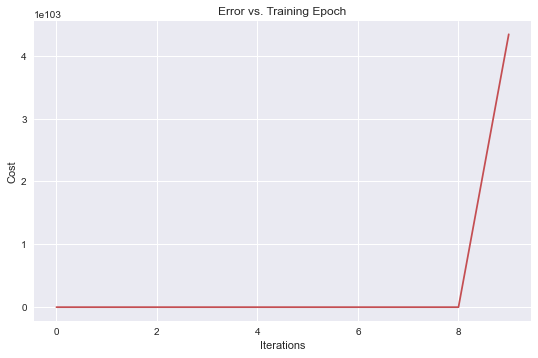

In [37]:
# #plot the cost
# fig, ax = plt.subplots()  
# ax.plot(np.arange(iters), cost, 'r')  
# ax.set_xlabel('Iterations')  
# ax.set_ylabel('Cost')  
# ax.set_title('Error vs. Training Epoch')  